In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering

In [2]:
#read in raw data (replace ... with your own file directory where the data was saved)
df_VAN = pd.read_csv('data/df_neighborhood.csv')
df_VAC = pd.read_csv('data/df_county.csv')
df_VAZ = pd.read_csv('data/df_zipcode.csv')
df_VAZ24 = pd.read_csv('data/Agent_research.csv')




In [3]:
df_VAZ24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   MLS #                                     367 non-null    object 
 1   Cat                                       367 non-null    object 
 2   Status                                    367 non-null    object 
 3   Address                                   367 non-null    object 
 4   City                                      367 non-null    object 
 5   County                                    367 non-null    object 
 6   Beds                                      367 non-null    int64  
 7   Baths                                     366 non-null    object 
 8   Structure Type                            367 non-null    object 
 9   Status Contractual Search Date            367 non-null    object 
 10  Current Price                         

In [6]:
# #Select fields that are of interest
# fields=[
# 'region',
# 'median_sale_price_yoy',
# 'homes_sold_yoy',
# 'new_listings_yoy',
# 'median_dom',
# 'avg_sale_to_list',
# ]
# df_VAZ24[fields]


KeyError: "None of [Index(['region', 'median_sale_price_yoy', 'homes_sold_yoy', 'new_listings_yoy',\n       'median_dom', 'avg_sale_to_list'],\n      dtype='object')] are in the [columns]"

In [10]:
#Select fields that are of interest
fields=[
'region',
'median_sale_price_yoy',
'homes_sold_yoy',
'new_listings_yoy',
'median_dom',
'avg_sale_to_list',
]

dfn=df_VAN[fields].set_index('region')
dfc=df_VAC[fields].set_index('region')
dfz=df_VAZ[fields].set_index('region')
# dfz24=df_VAZ24[fields].set_index('region')


# df.head()
# dfc.info()
# dfz.head())
dlist=['df','dfc','dfz']


In [11]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, Zip Code: 22645 to Zip Code: 23803
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   median_sale_price_yoy  205 non-null    float64
 1   homes_sold_yoy         205 non-null    float64
 2   new_listings_yoy       205 non-null    float64
 3   median_dom             205 non-null    float64
 4   avg_sale_to_list       205 non-null    float64
dtypes: float64(5)
memory usage: 9.6+ KB


In [24]:
dfz.head()

,median_sale_price_yoy,homes_sold_yoy,new_listings_yoy,median_dom,avg_sale_to_list
region,,,,,
Zip Code: 22645,0.508308,-0.214286,-0.285714,33.0,1.005716
Zip Code: 22554,0.109285,0.151316,0.295880,16.0,1.019942
Zip Code: 23457,-0.006166,-0.178571,-0.105263,35.5,0.993478
Zip Code: 20165,0.151685,-0.130435,-0.048193,13.0,1.019778
Zip Code: 22025,0.140787,-0.087500,0.037500,11.0,1.018282


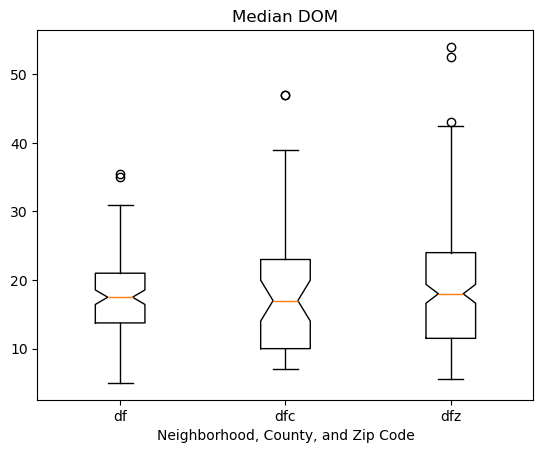

In [12]:

fig, ax= plt.subplots()
ax.boxplot((dfn['median_dom'],dfc['median_dom'],dfz['median_dom']),1)
ax.set(
    title='Median DOM',
    xlabel="Neighborhood, County, and Zip Code",
    xticklabels = dlist
)

plt.show()

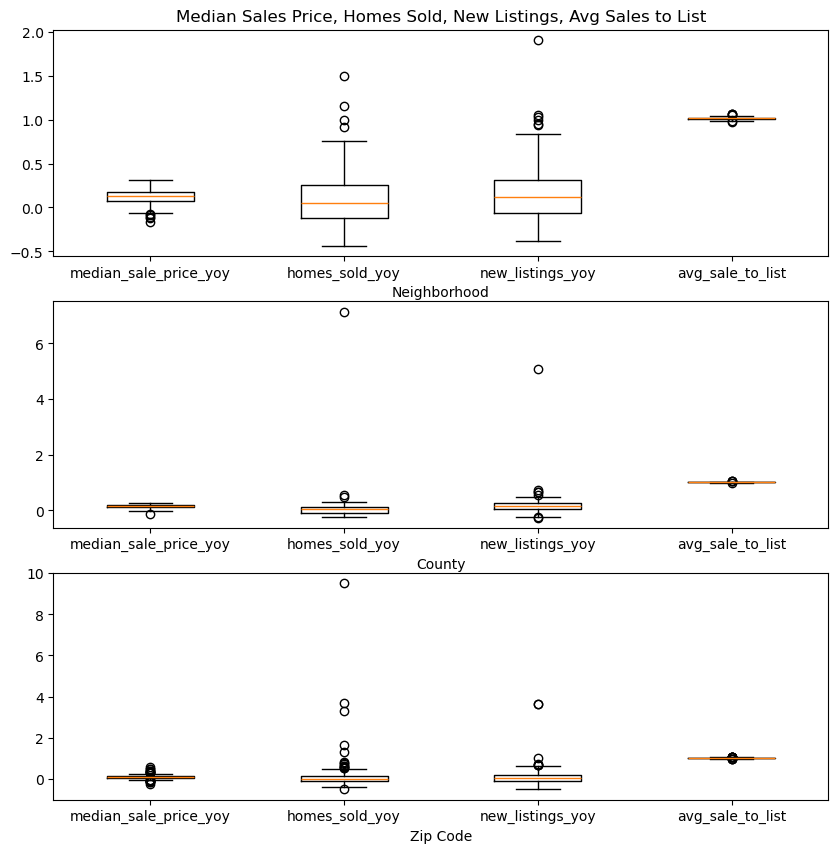

In [13]:

field_list = ['median_sale_price_yoy','homes_sold_yoy','new_listings_yoy', 'avg_sale_to_list']
fig, axs = plt.subplots(3,figsize=(10,10))
axs[0].boxplot(dfn[field_list])
axs[0].set(
    title='Median Sales Price, Homes Sold, New Listings, Avg Sales to List',
    xlabel="Neighborhood",
    xticklabels = field_list
)
axs[1].boxplot(dfc[field_list])
axs[1].set(
    # title='Median Sales Price, Homes Sold, New Listings, Avg Sales to List',
    xlabel="County",
    xticklabels = field_list
)
axs[2].boxplot(dfz[field_list])
axs[2].set(
    # title='Median Sales Price, Homes Sold, New Listings, Avg Sales to List',
    xlabel="Zip Code",
    xticklabels = field_list
)
# fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
plt.show()

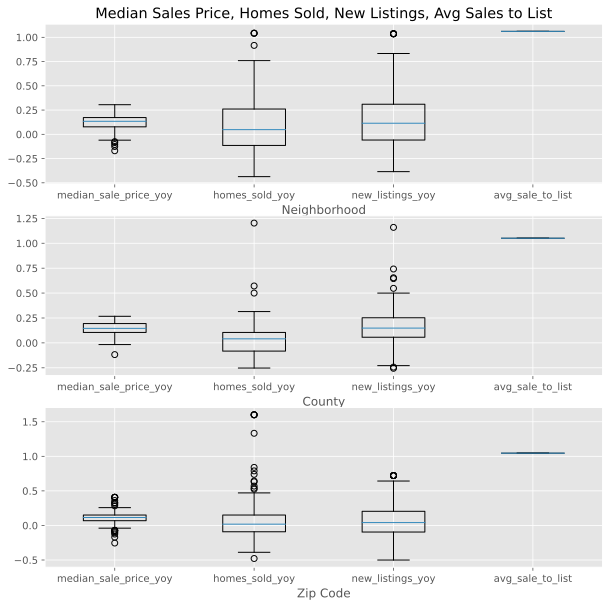

In [120]:
def fix_outliers(df):
    for col in df.columns:
        percentiles = df[col].quantile([0.00,0.985]).values 
        thresh = percentiles[1]
        df[col]=np.where(df[col]>= thresh-(thresh*.1), thresh, df[col])

fix_outliers(dfn)
fix_outliers(dfc)
fix_outliers(dfz)

field_list = ['median_sale_price_yoy','homes_sold_yoy','new_listings_yoy', 'avg_sale_to_list']
fig, axs = plt.subplots(3,figsize=(10,10))
axs[0].boxplot(dfn[field_list])
axs[0].set(
    title='Median Sales Price, Homes Sold, New Listings, Avg Sales to List',
    xlabel="Neighborhood",
    xticklabels = field_list
)
axs[1].boxplot(dfc[field_list])
axs[1].set(
    # title='Median Sales Price, Homes Sold, New Listings, Avg Sales to List',
    xlabel="County",
    xticklabels = field_list
)
axs[2].boxplot(dfz[field_list])
axs[2].set(
    # title='Median Sales Price, Homes Sold, New Listings, Avg Sales to List',
    xlabel="Zip Code",
    xticklabels = field_list
)
plt.show()

In [14]:
df = name = dfc


In [15]:
#Scale all the features using min-max scaler
minmax_scaler=MinMaxScaler()
scaled_features=minmax_scaler.fit_transform(df)



array([0.48950742, 0.31927899, 0.11038925, 0.07719707, 0.00362726])

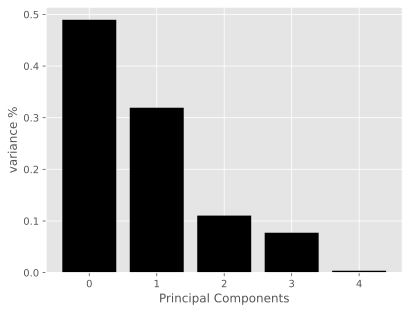

In [16]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

minmax_scaler=MinMaxScaler()
scaled_features=minmax_scaler.fit_transform(df)

#Create a PCA instance
pca=PCA(n_components=5)
principalComponents=pca.fit_transform(scaled_features)

#Plot the expained variaces
features=range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_,color='black')
plt.xlabel("Principal Components")
plt.ylabel('variance %')
plt.xticks(features)

#Save components to a dataframe
PCA_components=pd.DataFrame(principalComponents)

#Show the expained variance by each principal component
pca.explained_variance_ratio_

In [17]:
weights = pca.components_
print(df.columns)
print(weights)

Index(['median_sale_price_yoy', 'homes_sold_yoy', 'new_listings_yoy',
       'median_dom', 'avg_sale_to_list'],
      dtype='object')
[[ 0.3684123  -0.15889446 -0.12795323  0.83594175 -0.35192938]
 [-0.5570732   0.49681183  0.50883201  0.28166965 -0.3234187 ]
 [ 0.68077734  0.48119314  0.46869026 -0.01399063  0.29176887]
 [-0.30077611 -0.03551054 -0.02835473  0.4702445   0.8284557 ]
 [-0.00421642  0.70364957 -0.71010098  0.02319411 -0.00883915]]


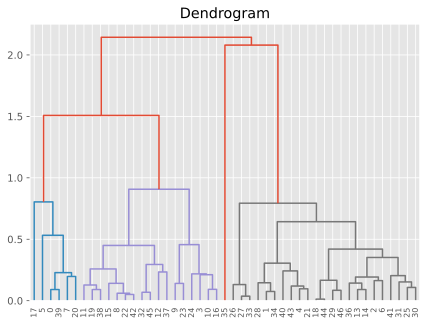

In [18]:

#Create a dendrogram using hierarchical clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(7, 5))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(PCA_components, method='ward'))

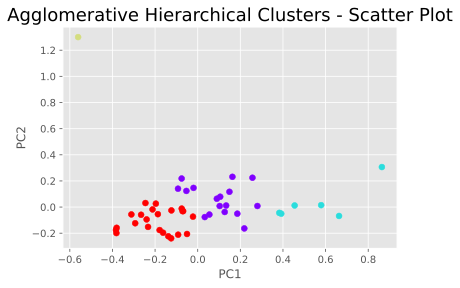

In [19]:
#plot scatter plot
agc = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize=(6, 4))
plt. scatter(PCA_components[0],PCA_components[1], c = agc.fit_predict(PCA_components), cmap ='rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt. title ('Agglomerative Hierarchical Clusters - Scatter Plot', fontsize = 18)
plt.show()

/home/lrhf97/anaconda3/envs/realestate_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/lrhf97/anaconda3/envs/realestate_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/lrhf97/anaconda3/envs/realestate_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/lrhf97/anaconda3/envs/realestate_env/lib/python3.12/site-packages/sklearn/cluster/

<function matplotlib.pyplot.show(close=None, block=None)>

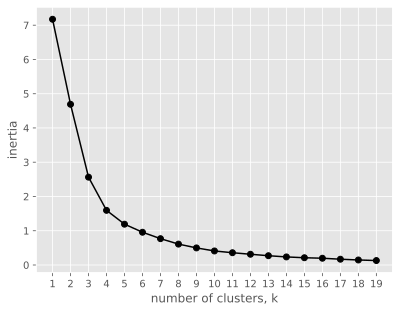

In [20]:

#Elbow method
ks=range(1,20)
inertias=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:3]) #we only use the first 3 principal components
    inertias.append(model.inertia_)
    
plt.plot(ks,inertias, '-o',color='black')    
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show

/home/lrhf97/anaconda3/envs/realestate_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


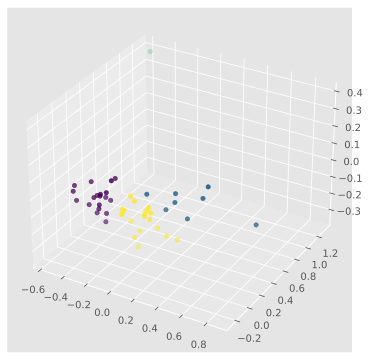

In [21]:
#plot 3-D scatter plot
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
kmeans=KMeans(n_clusters=4, init='k-means++',random_state=42)
kmeans.fit(PCA_components.iloc[:,:3])
labels=kmeans.predict(PCA_components.iloc[:,:3])

fig = pyplot.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(PCA_components[0],PCA_components[1],PCA_components[2],c=labels)
pyplot.show()

In [22]:
#Add cluster labels to the original dataset and export to csv file
df_VAC['cluster_nbr']=kmeans.labels_
df_VAC_clusters=pd.concat([df_VAC.reset_index(drop=True),pd.DataFrame(principalComponents)],axis=1)
df_VAC_clusters.to_csv('resource/df_countyC.csv')

In [23]:
df_VAC_clusters.head()

,Unnamed: 0,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,...,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,cluster_nbr,0,1,2,3,4
0,6803,2021-07-01,2021-07-31,30,county,5,3002,f,"Orange County, VA",NaN,...,0.090690,Virginia nonmetropolitan area,NaN,2022-01-09 14:29:56,1,0.391881,-0.050605,0.157209,0.009289,-0.003391
1,16181,2021-07-01,2021-07-31,30,county,5,3042,f,"Fairfax City County, VA",NaN,...,-0.061688,"Washington, DC",47894.0,2022-01-09 14:29:56,0,-0.124651,-0.238968,0.110227,-0.132770,0.039377
2,18476,2021-07-01,2021-07-31,30,county,5,2965,f,"Fairfax County, VA",NaN,...,-0.034856,"Washington, DC",47894.0,2022-01-09 14:29:56,0,-0.245256,0.030881,-0.163436,0.020065,0.001093
3,28014,2021-07-01,2021-07-31,30,county,5,3055,f,"Newport News, VA",NaN,...,0.091371,"Virginia Beach, VA",47260.0,2022-01-09 14:29:56,3,-0.092403,0.140550,-0.163088,0.109940,-0.038812
4,32101,2021-07-01,2021-07-31,30,county,5,2978,f,"Hanover County, VA",NaN,...,0.004210,"Richmond, VA",40060.0,2022-01-09 14:29:56,0,-0.162415,-0.196309,0.027792,-0.040399,0.037734
